# Self-Assessment : Probability

In [25]:
%matplotlib inline
import math as m
from matplotlib import pyplot as plt

def plot(v1, v2):
    plt.clf()
    plt.plot(v1, v2)
    plt.show()

## Die cast

*Suppose a pair of fair 6-sided dice are thrown. What is the probability that the sum of the rolls is 6? (Answer as a simple fraction of integers)*

Probability of a number in a single dice: $\frac{1}{6}$  
Probability of two numbers in a pair of dice: $\frac{1}{6}\cdot\frac{1}{6} = \frac{1}{36}$

Consider two dice (a, b), the combinations of both dice are:

(1,1)	(1,2)	(1,3)	(1,4)	(**1,5**)	(1,6)  
(2,1)	(2,2)	(2,3)	(**2,4**)	(2,5)	(2,6)  
(3,1)	(3,2)	(**3,3**)	(3,4)	(3,5)	(3,6)  
(4,1)	(**4,2**)	(4,3)	(4,4)	(4,5)	(4,6)  
(**5,1**)	(5,2)	(5,3)	(5,4)	(5,5)	(5,6)  
(6,1)	(6,2)	(6,3)	(6,4)	(6,5)	(6,6)  

The sum of dice equals to 6 in 5 combinations, thus, the probability of the sum occur is: $\frac{5}{36}$

In [10]:
dice_a = [1,2,3,4,5,6]
dice_b = [1,2,3,4,5,6]
count = 0
for a in dice_a:
    for b in dice_b:
        if a+b == 6:
            count += 1
size = len(dice_a)*len(dice_b)
prob = float(count)/size
print 'Probability of the sum of both dice equals to 6: (%d/%d)=%f' % (count, size, prob)

Probability of the sum of both dice equals to 6: (5/36)=0.138889


##  The Birthday Problem

*Consider a class of 20 students. What is the probability that **no** two students share have the same Birth Date? (Assume that a year has only 365 days and that each birth is independent of the other). Round the answer to two decimal places. As an exercise, try to do this when there are $n$ students, where $n$ is an integer greater than 1. Draw a graph of probaility as $n$ increases.*

As the sum of the probabilities of happen and not happen an event has to sum to 1, in this problem it is easier to consider when two people will not have the birthday in the same date. Thus, the probability of one person has a date of birth (in any day) is equal to $\frac{365}{365}$. For the second person, the probability of having the same date of birth of the first one is $\frac{1}{365}$, and thus, the probability of the second person not having the birthday in the same date is $\frac{364}{365}$, leaving 363 days to a third person birthday.

Therefore, the probability for 3 people have different birthdays are:

$$ \frac{365}{365}\cdot\frac{364}{365}\cdot\frac{363}{365} = \frac{48,228,180}{48,627,125} \approx 0.9917 $$

We can add up to $n$ people, decreasing the numerator of the equation for each person added. Converting to an equation, we have:

$$ \frac{365}{365}\cdot\frac{364}{365}\cdot\frac{363}{365}\cdot \ldots \cdot\frac{365-n+1}{365} $$

This equation can be interpreted in terms of factorial, as in the numerator we have the factorial of 365 up to the factorial of $n$ numbers. In order to remove the rest of the factorial after the $n$ number, we divide the numerator by the factorial of the $n-1$th number. Thus, in case where we have three terms, the numerator becomes:

$$ \frac{365!}{362!}\ \ \ \ \rightarrow\ \ \ \ \frac{365!}{(365-n)!} $$

The final equation turns out as:

$$ \frac{365!}{(365-n)! \cdot 365^n} $$

If we want to find the probability of two people sharing the same date, we can subtract the total probability (100%) of the probability of two having the same date as:

$$ P(same\_birthday) = 1 - P(different\_birthday) $$

In [50]:
n = 20 

vprobs, vpeople = [], []
prob = 1
for p in range(n):
    pb_person = float(365-p)/365
    prob *= pb_person
    vprobs.append(prob)
    vpeople.append(p+1)
    print 'Person %d: %f' % (p+1, prob)

Person 1: 1.000000
Person 2: 0.997260
Person 3: 0.991796
Person 4: 0.983644
Person 5: 0.972864
Person 6: 0.959538
Person 7: 0.943764
Person 8: 0.925665
Person 9: 0.905376
Person 10: 0.883052
Person 11: 0.858859
Person 12: 0.832975
Person 13: 0.805590
Person 14: 0.776897
Person 15: 0.747099
Person 16: 0.716396
Person 17: 0.684992
Person 18: 0.653089
Person 19: 0.620881
Person 20: 0.588562


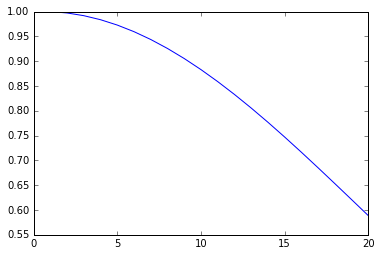

In [52]:
# Plot the increasing of probability as we increase the number of people
plot(vpeople, vprobs)

## Sampling with Replacement

*Suppose there are 10 identical items. 10 items are selected one by one with replacement. What is the probability that a particular item is not selected? As an exercise, consider number of items as $n$. Find a general formula for probability. Especially, find out what happens when $n$ becomes very large(You will use this concept later in a concept called Bagging)*

The probability of not selecting an item can be calculated as the probability of taking the other items minus the probability of selecting the target item, or simplifying:

$$ P(not\_item) = 1 - P(item) $$

As we have 10 items, the probability of selecting an item is equal to $\frac{1}{10} = 0.1$, and the probability of not selecting an item corresponds to $P(not\_item) = 1 - 0.1 = 0.9$. As we try using replacement, the probability of each action is independent of the action before, keeping the probability equal for all selecions. Trying 10 times with replacement, we have for the number of trials:

$
P(trials) = P(not\_item) . P(not\_item) . P(not\_item) \ldots . P(not\_item)
$

Replacing the values in the equation, we have:

$
P(trials) = 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9 \cdot 0.9
$<br>$
P(trials) = 0.35
$

Generalizing to $n$ trials, we have:

$$ P(trials) = P(not\_item)^{n} $$

In [54]:
n = 10
items = range(10)
P_item = 1./(len(items))
Pnot_item = 1 - P_item
Ptrials = Pnot_item**n
print 'Probability that a particular item is not selected: %f' % Ptrials

Probability that a particular item is not selected: 0.348678


## Conditional Probability

*When a fair coin is tossed 5 times, what is the probability that exactly three heads are observed when it is known that there is at least one head? (express as a fraction)*

First we eliminate the possibility of having no head when tossing a coin. No heads occur only once, when all 5 tosses are tail. As the coin is tossed 5 times, we have an universe of $2^5$ possibilities minus all tails: $possibilities = 2^5 - 1 = 31 $. 

Now that we know how many possibilities exists, we have to discover how many times 3 heads occur when tossing 5 times. By combinatorial analysis, we know that 

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

where $n$ is the number of times we flip a coin and $k$ is the total number of elements we want to find combined. Replacing values in the equation, we have

$$
\binom{5}{3} = \frac{5!}{3!(5-3)!} = \frac{120}{6(2)!} = \frac{120}{12} = 10
$$

Thus, we have 10 possibilities of finding 3 heads in 5 tosses. Finally, the probability that exactly three heads are observed when it is known that there is at least one head is $\frac{10}{31}$. 


In [18]:
from collections import Counter
coin = ['head', 'tail']
c = 0
c_3heads = 0
for c1 in coin:
    for c2 in coin:
        for c3 in coin:
            for c4 in coin:
                for c5 in coin:
                    if 'head' in [c1, c2, c3, c4, c5]:
                        count_c = Counter([c1, c2, c3, c4, c5])
                        if count_c['head'] == 3:
                            c_3heads += 1
                        c += 1
print 'Total of possibilities: ',c
print 'Possibilities with exactly 3 heads: ', c_3heads
print 'P(3_heads in 5_times) = %d/%d = %f' % (c_3heads, c, float(c_3heads)/c)

Total of possibilities:  31
Possibilities with exactly 3 heads:  10
P(3_heads in 5_times) = 10/31 = 0.322581


## Bayes Theorem

In a particular hospital during Flu season, it was observed that 10% of the patients had Cold. Among the patients with cold, 80% had Flu and among the rest, only 5% had flu. Given that a particular patient had Flu, what is the probability that he had Cold?

